In [2]:
import numpy as np
from matplotlib import pyplot as plt

## 1. Utforska och jämför resultaten alpha  lika med  0.1 ,  0.2 ,  0.3  &  0.5 i det Icke-stationära (nonstationary) problemet. 

Simulation complete!
Simulation complete!
Simulation complete!
Simulation complete!


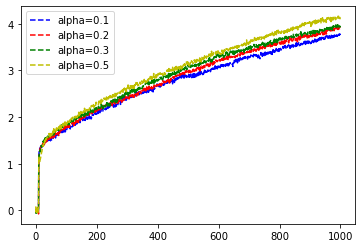

In [23]:
# Added Q (i.e initial Q)

class Bandit(object):
    def __init__(self, numArms, trueRewards, epsilon, mode, Q, C=0, alpha=0.1, random=True): #<----
        self.Q = [Q for i in range(numArms)]
        self.N = [0 for i in range(numArms)]
        self.C = C
        self.numArms = numArms
        self.epsilon = epsilon
        self.trueRewards = trueRewards
        self.lastAction = None
        self.steps = 0
        self.a = alpha
        self.mode = mode
        self.random = random#<----
        
    def pull(self):
        rand = np.random.random()
        if self.C == 0: # vanilla epsilon-greedy        
            if rand <= self.epsilon:           
                whichArm = np.random.choice(self.numArms)
            elif rand > self.epsilon:
                a = np.array([approx for approx in self.Q])
                whichArm = np.random.choice(np.where(a == a.max())[0]) 

        elif self.C > 0: # UCB
            a = np.zeros(self.numArms)
            for idx, approx in enumerate(self.Q):      
                if self.N[idx] != 0:          
                    a[idx] = approx + self.C * np.sqrt(np.log(self.steps)/self.N[idx])
                elif self.N[idx] == 0:
                    whichArm = idx
                    break
            else: # for / else, klurigt!
                whichArm = np.random.choice(np.where(a == a.max())[0])            
        if self.random: self.trueRewards = [reward + 0.1*np.random.randn() for reward in self.trueRewards]
        self.lastAction = whichArm       
        self.steps += 1       
        return np.random.randn() + self.trueRewards[whichArm]
    
    def updateMean(self,sample):
        whichArm = self.lastAction
        self.N[whichArm] += 1  
    
        if self.mode == 'sample-average':
            self.Q[whichArm] = self.Q[whichArm] + 1.0/self.N[whichArm] * (sample - self.Q[whichArm])
        elif self.mode == 'constant':
            self.Q[whichArm] = self.Q[whichArm] + self.a * (sample - self.Q[whichArm])  # 0.1 is alpha
            
            
def simulate(numArms, epsilon, numPulls, mode, Q, C=0, alpha=0.1, random=True):
    rewardHistory = np.zeros(numPulls)
    for j in range(2000):
        if j % 200 == 0:
            print(j, 'pulls...', end='\r', flush=True)
        rewards = [np.random.randn() for _ in range(numArms)]
        bandit = Bandit(numArms, rewards, epsilon, mode, Q, alpha)
        for i in range(numPulls):
            reward = bandit.pull()
            bandit.updateMean(reward)
            rewardHistory[i] += reward
    else: print('Simulation complete!')
    average = rewardHistory / 2000
    return average

numActions = 10
run1 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, alpha = 0.1)
run2 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, alpha = 0.2)
run3 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, alpha = 0.3)
run4 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='constant', Q = 0, alpha = 0.5)
plt.plot(run1, 'b--', run2, 'r--', run3, 'g--', run4, 'y--', )
plt.legend(['alpha=0.1', 'alpha=0.2', 'alpha=0.3', 'alpha=0.5'])
plt.show()

Det är ganska klart: desto högre alpha, desto bättre resultat. Den är dock mycket mindre skillnad då alpha >= 0.2, så troligen skulle ytterligare ökning av alpha inte löna sig. Eftersom belöningen randomiseras under varje dragning vore det naturligtvis skadligt att beakta gamla belöningar för mycket, men å andra sidan behövs detta tidsperspektiv för att beakta förändringen. Annars skulle agenten alltid dra i den spak som senast gav en belöning, dvs. densamma som under förra dragningen (om inte belöningen var negativ).

Kurvorna hinner inte heller plana ut på 1000 spel.

# För det stationära (stationary) problemet: (OBS!)
## 2. I det optimistiska (optimistic) problemet, jämför resultaten för epsilon =  0 ,  Q1(a) =  1,  5  &  10 

Simulation complete!
Simulation complete!
Simulation complete!


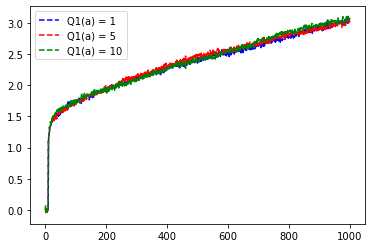

In [24]:
numActions = 10
run21 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 1, C = 0, random=False)
run22 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 5, C = 0, random=False)
run23 = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 10, C = 0, random=False)
plt.plot(run21, 'b--', run22, 'r--', run23, 'g--')
plt.legend(['Q1(a) = 1', 'Q1(a) = 5', 'Q1(a) = 10'])
plt.show()

TODO: JÄMFÖR!

## 3. Hur resultatet från uppgift 2 ändras om vi i stället använder epsilon = 0.1?

Simulation complete!
Simulation complete!
Simulation complete!
epsilon=0.1


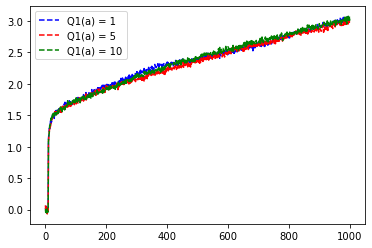

In [25]:
numActions = 10
run31 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 1, C = 0, random=False)
run32 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 5, C = 0, random=False)
run33 = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 10, C = 0, random=False)
print('epsilon=0.1')
plt.plot(run31, 'b--', run32, 'r--', run33, 'g--')
plt.legend(['Q1(a) = 1', 'Q1(a) = 5', 'Q1(a) = 10'])
plt.show()

TODO: JÄMFÖR!

## 4. Jämför resultaten i det optimistiska problemet med: 
a. epsilon - g r e e d y ,  epsilon =  0.1 ,  Q 1(a) = 0

b. Optimistisk med Q1(a) = 10 och epsilon = 0.1

c. UCB med Q1(a) = 0 och C  =  2(UCB)

Simulation complete!
Simulation complete!
Simulation complete!


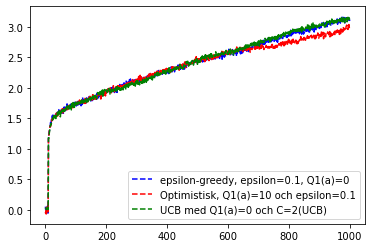

In [26]:
numActions = 10
runa = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 0, C = 0, random=False)
runb = simulate(numActions, epsilon=0.1, numPulls=1000, mode='sample-average', Q = 10, C = 0, random=False)
runc = simulate(numActions, epsilon=0, numPulls=1000, mode='sample-average', Q = 0, C = 2, random=False)
plt.plot(runa, 'b--', runb, 'r--', runc, 'g--')
plt.legend(['epsilon-greedy, epsilon=0.1, Q1(a)=0', 'Optimistisk, Q1(a)=10 och epsilon=0.1', 'UCB med Q1(a)=0 och C=2(UCB)'])
plt.show()

TODO: JÄMFÖR!

## 5. Visa hur resultaten ändras när UCB har epsilon = 0.1

TODO: JÄMFÖR!